**Tugas Konveksi Paksa Aliran Eksternal**

Nama: Deedat Fatahillah \
NIM : 13320072

Untuk menentukan nilai heat loss per satuan panjang yang terjadi pada pipa konveksi paksa aliran eksternal,\
 akan dilakukan tahapan pemrograman yang dapat dibaca pada flowchart berikut:

![Flowchart pengerjaan](flowchart1.png "Flowchart pengerjaan soal")

Implementasi program dari flowchart di atas dapat dilihat pada kode berikut:

```python

Deklarasi nilai temperatur dan kecepatan aliran yang dibutuhkan

In [17]:
Tic = 180+7+2   # Temperatur dalam pipa (Celcius) dengan menambahkan 3 digit NIM akhir
Tlc = 30 + 2    # Temperatur luar pipa (Celcius) dengan menambahkan 1 digit NIM akhir
Ti = Tic + 273  # Temperatur dalam pipa (Kelvin)
Tl = Tlc + 273  # Temperatur luar pipa (Kelvin)
V = 2           # m/s

Import library yang dibutuhkan

In [18]:
import CoolProp.CoolProp as cp  # Import CoolProp untuk menghitung properti fluida
import numpy as np              # Import numpy 
import matplotlib.pyplot as plt # Import matplotlib untuk plotting

Persamaan-persamaan umum yang digunakan dapat ditulis sebagai berikut:

In [19]:
def Re(v, V, D): # Fungsi untuk menghitung angka Reynolds
    return (D * V) / v

def Nu(Re, Pr): # Fungsi untuk menghitung angka Nusselt
    return 0.3 + (0.62 * Re**0.5 * Pr**(1/3))/((1+(0.4/Pr)**(2/3))**0.25) * (1+(Re/282000)**(5/8))**(4/5)

def h(Nu, k, D): # Fungsi untuk menghitung nilai konveksi (h)
    return Nu * k / D

def Rc(r1, r2, k): # Fungsi untuk menghitung Resistansi konduksi
    return np.log(r2/r1) / (2 * np.pi * k)

def Rh(r2, h): # Fungsi untuk menghitung Resistansi konveksi
    return 1 / (2 * np.pi * h * (r2))

def Pr(Cp, k, mu): # Fungsi untuk menghitung angka Prandtl
    return Cp * mu / k

Hasil perhitungan tanpa menggunakan insulasi

In [20]:
# Informasi Pipa
wall = 10.31e-3 # ketebalan dinding pipa (m)
D2 = 323.8e-3   # diameter pipa (m)
D1 = D2-2*wall  # diameter dalam pipa (m)
r1 = D1/2       # jari-jari dalam pipa (m)
r2 = D2/2       # jari-jari pipa (m)

# Data Tabel A.1 
T_tabel = [300, 400 , 600, 800, 1000]
k_tabel = [60.5, 56.7487 , 48.0559 , 39.2685 , 30.01169]
k_pipe = np.interp(Ti, T_tabel, k_tabel) # Menentukan nilai konduktivitas pipa dengan interpolasi

Ts_prev= 0
Ts_new = Tl + 1 # inisialisasi suhu permukaan pipa
i = 0

error = 1000
while error > 0.0001:
    error = abs(Ts_new - Ts_prev)
    Tf = (Ts_new + Tl) / 2 
    Pr = cp.PropsSI('Prandtl', 'T', Tf, 'P', 101325, 'Air') # Menghitung bilangan Prandtl dengan menggunakan Library CoolProp
    mu = cp.PropsSI('V', 'T', Tf, 'P', 101325, 'Air')       # Menghitung viskositas dengan menggunakan Library CoolProp
    rho = cp.PropsSI('D', 'T', Tf, 'P', 101325, 'Air')      # Menghitung densitas dengan menggunakan Library CoolProp
    k = cp.PropsSI('L', 'T', Tf, 'P', 101325, 'Air')        # Menghitung koefisien konduktivitas udara dengan menggunakan Library CoolProp
    v = mu / rho
    Re1 = Re(v, V, D2)
    Nu1 = Nu(Re1, Pr)
    h1 = h(Nu1, k, D2)
    Rk1 = Rc(r1, r2, k_pipe)
    Rh1 = Rh(r2, h1)
    Q = (Ti - Tl)/ (Rk1 + Rh1)
    Ts_prev = Ts_new
    Ts_new = Q*Rh1 + Tl
    if i==0:
        print(Q)
        print(Ts_new)
    i += 1
print('Temperatur di permukaan pipa: ', Ts_new-273, 'C')
print('Kalor yang dilepaskan per panjang: ', Q, 'W/m')

1571.5917639934692
461.69552320026014
Temperatur di permukaan pipa:  188.712273917081 C
Kalor yang dilepaskan per panjang:  1485.1310266920996 W/m


Dengan Insulasi 

In [21]:
# Informasi Pipa
wall = 10.31e-3 # ketebalan dinding pipa (m)
D2 = 323.8e-3   # diameter pipa (m)
D1 = D2-2*wall  # diameter dalam pipa (m)
r1 = D1/2       # jari-jari dalam pipa (m)
r2 = D2/2       # jari-jari pipa (m)

# Informasi insulator
widthI = 1*0.0254 # Ketebalan insulasi (m)
KI = 0.03
r3 = r2 + widthI # jari-jari insulator (m)

# Informasi Cladding
widthC = 2*0.0254 # Ketebalan cladding (m)
Kcladd = 52
r4 = r3 + widthC # jari-jari cladding (m)

# Diameter Pipa keseluruhan (m)
D3 = 2*r4           

# Data Tabel A.1 
T_tabel = [300, 400 , 600, 800, 1000]
k_tabel = [60.5, 56.7487 , 48.0559 , 39.2685 , 30.01169]
k_pipe = np.interp(Ti, T_tabel, k_tabel)  # Menentukan nilai konduktivitas pipa dengan interpolasi

Rp = np.log(r2/r1) / (2 * np.pi * k_pipe) # Menghitung resistansi konduksi pipa
Ri = np.log(r3/r2) / (2 * np.pi * KI)     # Menghitung resistansi konduksi insulator
Rc = np.log(r4/r3) / (2 * np.pi * Kcladd) # Menghitung resistansi konduksi cladding

Ts_prev = 0
Ts_new = Tl + 1 # inisialisasi suhu permukaan pipa
error = 1000
while error > 0.0001:
    error = abs(Ts_new - Ts_prev)
    Tf = (Ts_new + Tl) / 2 
    Pr = cp.PropsSI('Prandtl', 'T', Tf, 'P', 101325, 'Air') # Menghitung bilangan Prandtl dengan menggunakan Library CoolProp
    mu = cp.PropsSI('V', 'T', Tf, 'P', 101325, 'Air')       # Menghitung viskositas dengan menggunakan Library CoolProp
    rho = cp.PropsSI('D', 'T', Tf, 'P', 101325, 'Air')      # Menghitung densitas dengan menggunakan Library CoolProp
    k = cp.PropsSI('L', 'T', Tf, 'P', 101325, 'Air')        # Menghitung koefisien konduktivitas udara dengan menggunakan Library CoolProp
    v = mu / rho
    Re1 = Re(v, V, D3)
    Nu1 = Nu(Re1, Pr)
    h1 = h(Nu1, k, D3)
    Rh1 = Rh(r2, h1)
    Q = (Ti - Tl)/ (Rp + Ri + Rc + Rh1)
    Ts_prev = Ts_new
    Ts_new = Q*Rh1 + Tl
print('Temperatur di permukaan pipa: ', Ts_new-273, 'C')
print('Kalor yang dilepaskan per panjang: ', Q, 'W/m')

Temperatur di permukaan pipa:  52.52471253892645 C
Kalor yang dilepaskan per panjang:  176.30997289737715 W/m


**Regresi Data Tabel A.4**

Regresi T terhadap rho pada Tabel A.4

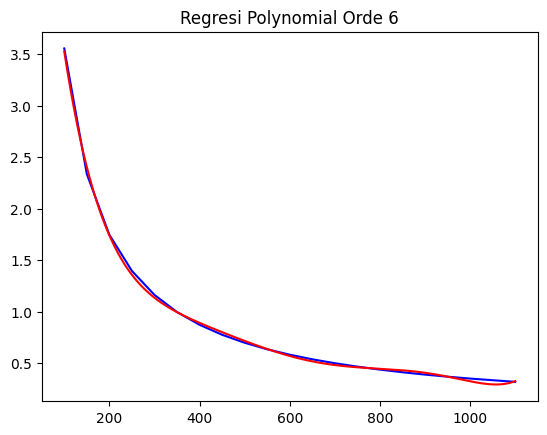

Persamaan regresi polynomial orde 6 adalah: 
           6             5            4             3             2
1.173e-16 x - 4.718e-13 x + 7.62e-10 x - 6.327e-07 x + 0.0002871 x - 0.06973 x + 8.189
Dengan rata-rata error sebesar: 0.19496645779290728


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
a4 = pd.read_excel('tabel-a4-more.xlsx')     # Membaca data dari tabel-a4-more.xlsx
x = a4['T'].values                           # Mengambil data kolom T
y = a4['rho'].values                         # Mengambil data kolom rho

error = []                           # Inisialisasi array untuk menyimpan error
meanError = 0                        # Inisialisasi array untuk menyimpan mean error
errorTol = 0.2

# Regresi Polinomial
for i in range(9):
    z = np.polyfit(x, y, i)
    p = np.poly1d(z)
    xp = np.linspace(x[0], x[len(x)-1], 1000)
    for j in range(len(x)):
        error.append(abs(y[j]-p(x[j])))
    meanError = np.mean(error)
    if meanError < errorTol:
        plt.plot(x, y, color='blue')
        plt.plot(xp, p(xp), color = 'red')
        plt.title('Regresi Polynomial Orde '+str(i))
        plt.show()
        break
print("Persamaan regresi polynomial orde "+str(i)+" adalah: \n" +str(p))
print(f"Dengan rata-rata error sebesar: {meanError}")

Regresi T terhadap Cp pada Tabel A.4

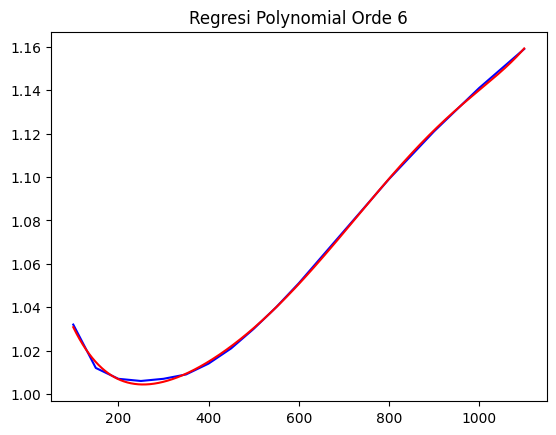

Persamaan regresi polynomial orde 6 adalah: 
           6             5            4             3             2
2.551e-18 x - 9.444e-15 x + 1.39e-11 x - 1.071e-08 x + 4.859e-06 x - 0.001129 x + 1.105
Dengan rata-rata error sebesar: 0.009701954053764724


In [23]:
import pandas as pd
a4 = pd.read_excel('tabel-a4-more.xlsx')
x = a4['T'].values
y = a4['Cp'].values

error = []                           # Inisialisasi array untuk menyimpan error
meanError = 0                        # Inisialisasi array untuk menyimpan mean error
errorTol = 0.01

# Regresi Polinomial
for i in range(9):
    z = np.polyfit(x, y, i)
    p = np.poly1d(z)
    xp = np.linspace(x[0], x[len(x)-1], 1000)
    for j in range(len(x)):
        error.append(abs(y[j]-p(x[j])))
    meanError = np.mean(error)
    if meanError < errorTol:
        plt.plot(x, y, color='blue')
        plt.plot(xp, p(xp), color = 'red')
        plt.title('Regresi Polynomial Orde '+str(i))
        plt.show()
        break
print("Persamaan regresi polynomial orde "+str(i)+" adalah: \n" +str(p))
print(f"Dengan rata-rata error sebesar: {meanError}")


Regresi T terhadap $\mu$ pada Tabel A.4

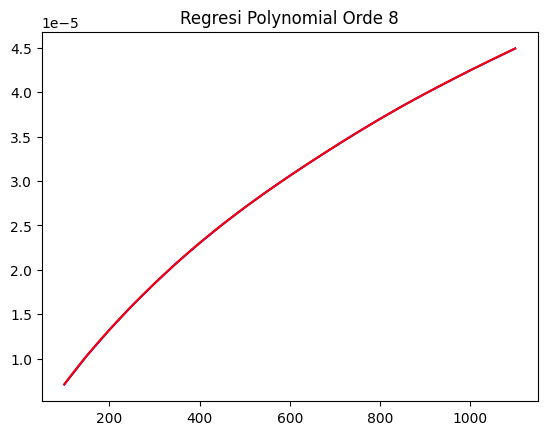

Persamaan regresi polynomial orde 8 adalah: 
            8            7             6             5             4
-4.344e-28 x + 2.18e-24 x - 4.544e-21 x + 5.099e-18 x - 3.348e-15 x
              3             2
 + 1.333e-12 x - 3.514e-10 x + 1.105e-07 x - 1.477e-06
Dengan rata-rata error sebesar: 2.4763199668936756e-05


In [24]:
import pandas as pd
a4 = pd.read_excel('tabel-a4-more.xlsx')
x = a4['T'].values
y = a4['mu'].values

error = []                           # Inisialisasi array untuk menyimpan error
meanError = 0                        # Inisialisasi array untuk menyimpan mean error
errorTol = 0.0001

# Regresi Polinomial
for i in range(9):
    z = np.polyfit(x, y, i)
    p = np.poly1d(z)
    xp = np.linspace(x[0], x[len(x)-1], 1000)
    for j in range(len(x)):
        error.append(abs(y[j]-p(j)))
    meanError = np.mean(error)
    if i == 8:
        plt.plot(x, y, color='blue')
        plt.plot(xp, p(xp), color = 'red')
        plt.title('Regresi Polynomial Orde '+str(i))
        plt.show()
        break
print("Persamaan regresi polynomial orde "+str(i)+" adalah: \n" +str(p))
print(f"Dengan rata-rata error sebesar: {meanError}")

**Regresi T terhadap v pada tabel A.4**

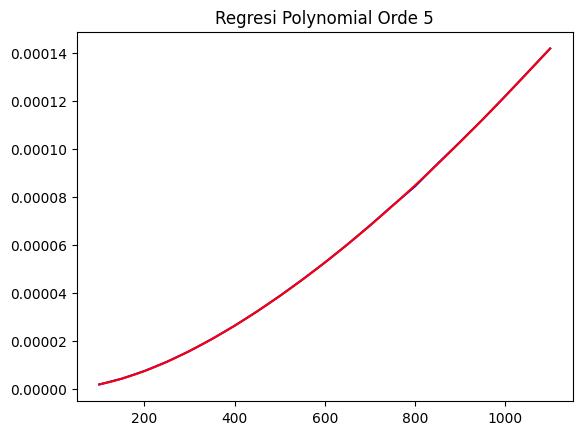

Persamaan regresi polynomial orde 5 adalah: 
            5             4             3             2
-4.986e-20 x + 1.672e-16 x - 2.362e-13 x + 2.443e-10 x - 3.668e-09 x + 1.678e-07
Dengan rata-rata error sebesar: 5.412488143939718e-08


In [25]:
import pandas as pd
a4 = pd.read_excel('tabel-a4-more.xlsx')
x = a4['T'].values
y = a4['v'].values

error = []                           # Inisialisasi array untuk menyimpan error
meanError = 0                        # Inisialisasi array untuk menyimpan mean error
orde = 5
# Regresi Polinomial
z = np.polyfit(x, y, orde)
p = np.poly1d(z)
xp = np.linspace(x[0], x[len(x)-1], 1000)
for j in range(len(x)):
    error.append(abs(y[j]-p(x[j])))
meanError = np.mean(error)
plt.plot(x, y, color='blue')
plt.plot(xp, p(xp), color = 'red')
plt.title('Regresi Polynomial Orde '+str(orde))
plt.show()
print("Persamaan regresi polynomial orde "+ str(orde) +" adalah: \n" +str(p))
print(f"Dengan rata-rata error sebesar: {meanError}")

**Regresi T terhadap k pada tabel A.4**

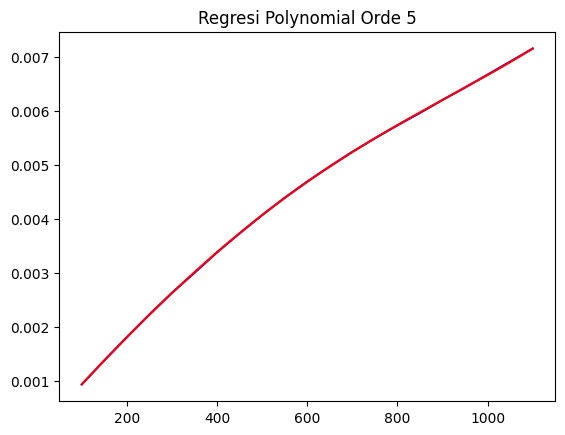

Persamaan regresi polynomial orde 5 adalah: 
           5             4             3             2
6.256e-19 x + 9.769e-16 x - 3.183e-12 x - 1.004e-09 x + 9.216e-06 x + 2.847e-05
Dengan rata-rata error sebesar: 4.101339609714582e-06


In [26]:
import pandas as pd
a4 = pd.read_excel('tabel-a4-more.xlsx')
x = a4['T'].values
y = a4['k'].values

error = []                           # Inisialisasi array untuk menyimpan error
meanError = 0                        # Inisialisasi array untuk menyimpan mean error
orde = 5
# Regresi Polinomial
z = np.polyfit(x, y, orde)
p = np.poly1d(z)
xp = np.linspace(x[0], x[len(x)-1], 1000)
for j in range(len(x)):
    error.append(abs(y[j]-p(x[j])))
meanError = np.mean(error)
plt.plot(x, y, color='blue')
plt.plot(xp, p(xp), color = 'red')
plt.title('Regresi Polynomial Orde '+str(orde))
plt.show()
print("Persamaan regresi polynomial orde "+ str(orde) +" adalah: \n" +str(p))
print(f"Dengan rata-rata error sebesar: {meanError}")

**Regresi T terhadap a pada tabel A.4**

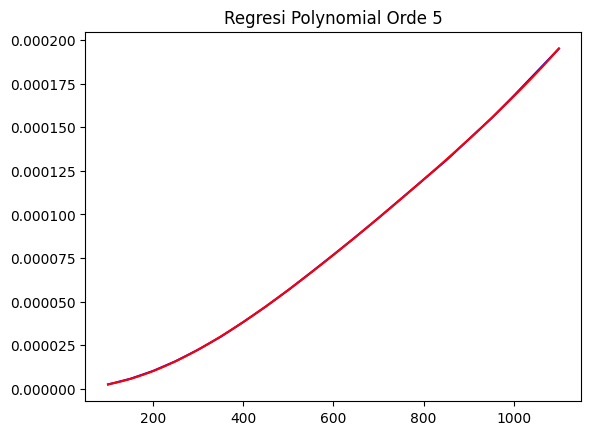

Persamaan regresi polynomial orde 5 adalah: 
           5             4             3             2
6.201e-20 x - 4.877e-17 x - 1.797e-13 x + 3.488e-10 x - 1.557e-08 x + 8.768e-07
Dengan rata-rata error sebesar: 9.347567404432298e-08


In [27]:
import pandas as pd
a4 = pd.read_excel('tabel-a4-more.xlsx')
x = a4['T'].values
y = a4['a'].values

error = []                           # Inisialisasi array untuk menyimpan error
meanError = 0                        # Inisialisasi array untuk menyimpan mean error
orde = 5
# Regresi Polinomial
z = np.polyfit(x, y, orde)
p = np.poly1d(z)
xp = np.linspace(x[0], x[len(x)-1], 1000)
for j in range(len(x)):
    error.append(abs(y[j]-p(x[j])))
meanError = np.mean(error)
plt.plot(x, y, color='blue')
plt.plot(xp, p(xp), color = 'red')
plt.title('Regresi Polynomial Orde '+str(orde))
plt.show()
print("Persamaan regresi polynomial orde "+ str(orde) +" adalah: \n" +str(p))
print(f"Dengan rata-rata error sebesar: {meanError}")

**Regresi T terhadap Pr pada tabel A.4**

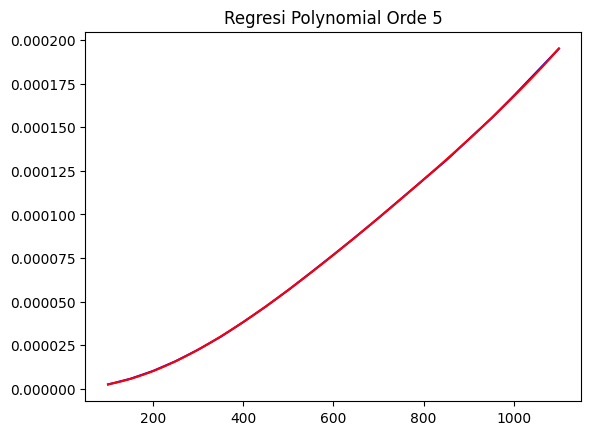

Persamaan regresi polynomial orde 5 adalah: 
           5             4             3             2
6.201e-20 x - 4.877e-17 x - 1.797e-13 x + 3.488e-10 x - 1.557e-08 x + 8.768e-07
Dengan rata-rata error sebesar: 9.347567404432298e-08


In [28]:
import pandas as pd
a4 = pd.read_excel('tabel-a4-more.xlsx')
x = a4['T'].values
y = a4['a'].values

error = []                           # Inisialisasi array untuk menyimpan error
meanError = 0                        # Inisialisasi array untuk menyimpan mean error
orde = 5
# Regresi Polinomial
z = np.polyfit(x, y, orde)
p = np.poly1d(z)
xp = np.linspace(x[0], x[len(x)-1], 1000)
for j in range(len(x)):
    error.append(abs(y[j]-p(x[j])))
meanError = np.mean(error)
plt.plot(x, y, color='blue')
plt.plot(xp, p(xp), color = 'red')
plt.title('Regresi Polynomial Orde '+str(orde))
plt.show()
print("Persamaan regresi polynomial orde "+ str(orde) +" adalah: \n" +str(p))
print(f"Dengan rata-rata error sebesar: {meanError}")

**Regresi Data Tabel A.1**

C:\Users\PRESTIGE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\PRESTIGE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\PRESTIGE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\PRESTIGE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\inter

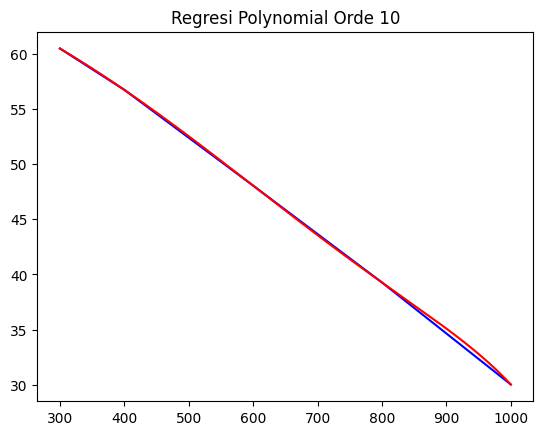

Persamaan regresi polynomial orde 10 adalah: 
           10             9             8             7             6
-6.33e-30 x  - 3.701e-27 x - 3.955e-25 x + 3.459e-21 x + 7.198e-18 x
              5             4            3             2
 + 9.011e-15 x + 5.312e-12 x - 8.15e-09 x - 2.752e-05 x - 0.01714 x + 68.27
Dengan rata-rata error sebesar: 0.9327746031170718


In [29]:
# Data Tabel A.1 
T_tabel = [300, 400 , 600, 800, 1000]
k_tabel = [60.5, 56.7487 , 48.0559 , 39.2685 , 30.01169]

error = []                          # Inisialisasi array untuk menyimpan error
meanError = 0                       # Inisialisasi nilai mean error
errorTol = 1

for i in range(1000):
    z = np.polyfit(T_tabel,k_tabel , i)
    p = np.poly1d(z)
    xp = np.linspace(T_tabel[0], T_tabel[len(T_tabel)-1], 1000)
    for j in range(len(T_tabel)):
        error.append(abs(k_tabel[j]-p(T_tabel[j])))
    meanError = np.mean(error)
    if meanError < errorTol:
        plt.plot(T_tabel, k_tabel, color='blue')
        plt.plot(xp, p(xp), color = 'red')
        plt.title('Regresi Polynomial Orde '+str(i))
        plt.show()
        break
print("Persamaan regresi polynomial orde "+str(i)+" adalah: \n" +str(p))
print(f"Dengan rata-rata error sebesar: {meanError}")